<a href="https://colab.research.google.com/github/sophiasy88/MATH3364_25Spring/blob/main/HW4solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Carseats.csv to Carseats.csv


In [2]:
import pandas as pd

# Load the Boston dataset provided by the user
boston_df = pd.read_csv('Boston.csv')

# Display the first few rows to understand structure
boston_df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


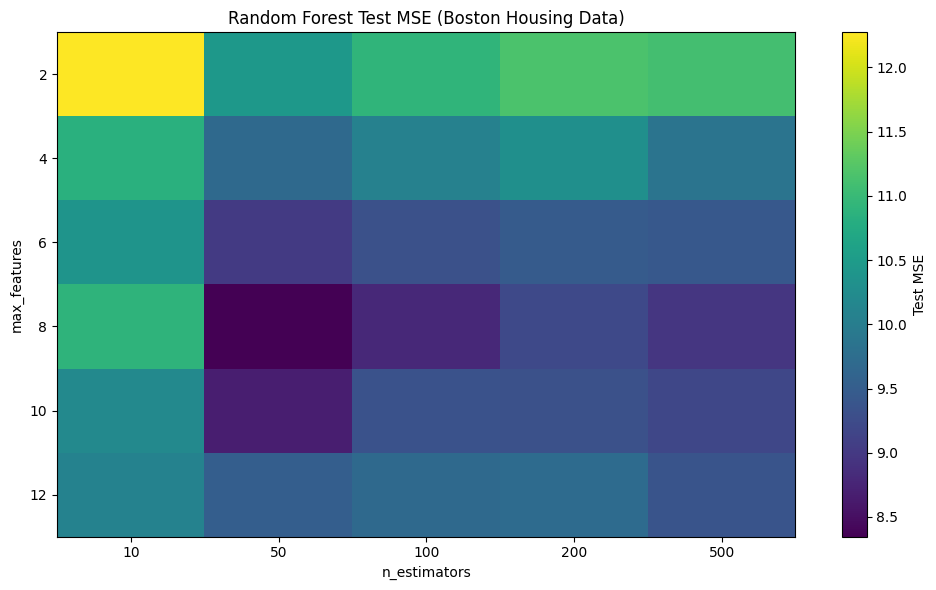

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = boston_df.drop(columns=["Unnamed: 0", "medv"])
y = boston_df["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter ranges
max_features_range = [2, 4, 6, 8, 10, 12]
n_estimators_range = [10, 50, 100, 200, 500]

# Initialize results matrix
results = np.zeros((len(max_features_range), len(n_estimators_range)))

# Train models and store test MSE
for i, max_features in enumerate(max_features_range):
    for j, n_estimators in enumerate(n_estimators_range):
        rf = RandomForestRegressor(max_features=max_features, n_estimators=n_estimators, random_state=42)
        rf.fit(X_train, y_train)
        preds = rf.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        results[i, j] = mse

# Plotting the results as a heatmap
plt.figure(figsize=(10, 6))
im = plt.imshow(results, interpolation='nearest', cmap="viridis", aspect='auto')
plt.colorbar(im, label="Test MSE")
plt.xticks(np.arange(len(n_estimators_range)), n_estimators_range)
plt.yticks(np.arange(len(max_features_range)), max_features_range)
plt.xlabel("n_estimators")
plt.ylabel("max_features")
plt.title("Random Forest Test MSE (Boston Housing Data)")
plt.tight_layout()
plt.show()

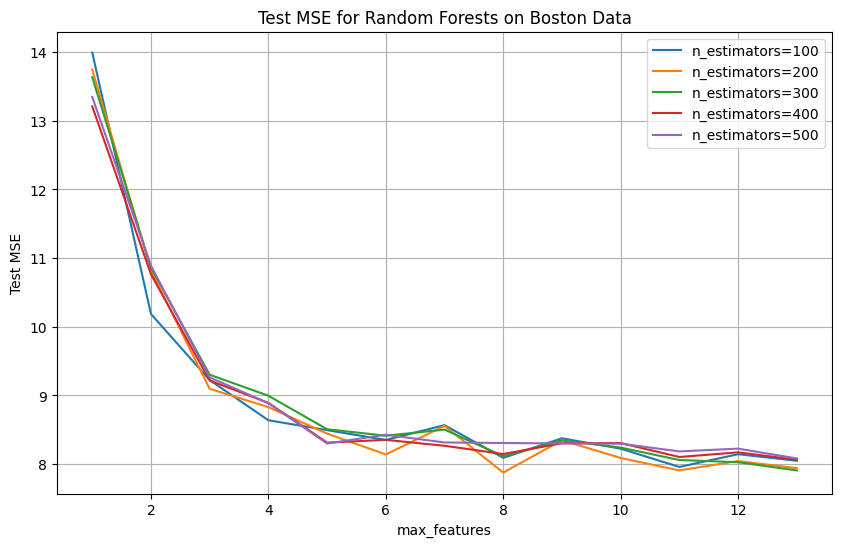

In [5]:
X = boston_df.drop(columns='medv')
y = boston_df['medv']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Parameters to test
max_features_values = list(range(1, X.shape[1] + 1))  # 1 to 13
n_estimators_values = [100, 200, 300, 400, 500]

# Dictionary to store test MSE
results = {}

for n_estimators in n_estimators_values:
    test_mse = []
    for max_features in max_features_values:
        rf = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features,
                                   random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        test_mse.append(mse)
    results[n_estimators] = test_mse

# Show plot
plt.figure(figsize=(10, 6))
for n_estimators in n_estimators_values:
    plt.plot(max_features_values, results[n_estimators], label=f'n_estimators={n_estimators}')

plt.xlabel('max_features')
plt.ylabel('Test MSE')
plt.title('Test MSE for Random Forests on Boston Data')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import pandas as pd

# Load the Boston dataset provided by the user
Carseat_df = pd.read_csv('Carseats.csv')

# Display the first few rows to understand structure
Carseat_df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


MSE for the decision tree: {6.093451666666666}


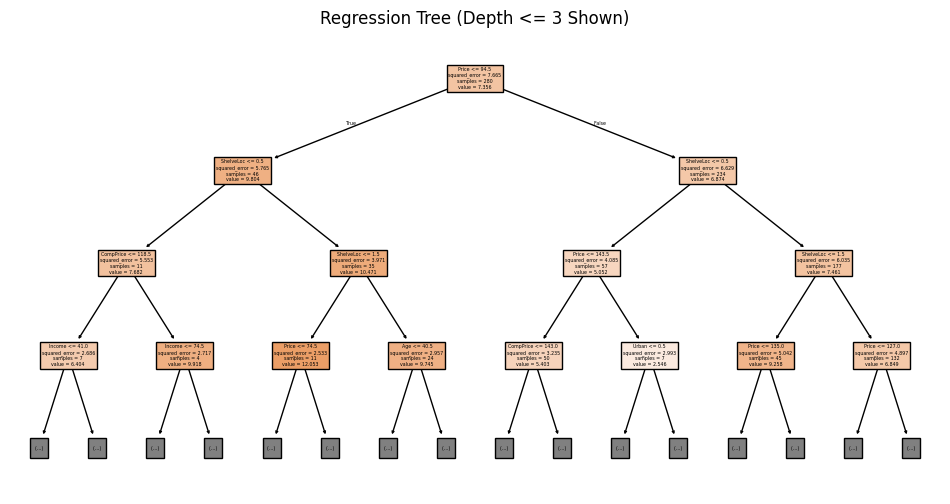

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Encode categorical variables
encoded_df = Carseat_df.copy()
label_encoders = {}
for col in ["ShelveLoc", "Urban", "US"]:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le
##a and b
# Features and target
X = encoded_df.drop(columns="Sales")
y = encoded_df["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Regression Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"MSE for the decision tree:" ,{mse_tree})
# Plot tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Regression Tree (Depth <= 3 Shown)")
plt.show()

In [13]:
### c. Cross-validation and pruning
# Use max_depth tuning via cross-validation
depths = range(1, 21)
cv_scores = [np.mean(cross_val_score(DecisionTreeRegressor(max_depth=d, random_state=42),
                                     X_train, y_train, scoring='neg_mean_squared_error', cv=5))
             for d in depths]
best_depth = depths[np.argmax(cv_scores)]
tree_pruned = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
tree_pruned.fit(X_train, y_train)
y_pred_pruned = tree_pruned.predict(X_test)
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
print(f"Best depth (via 5-fold CV): {best_depth}")
print(f"Test MSE after pruning (depth={best_depth}): {mse_pruned:.4f}")


Best depth (via 5-fold CV): 5
Test MSE after pruning (depth=5): 5.1017


MSE for bagging: {2.5759218064999994}


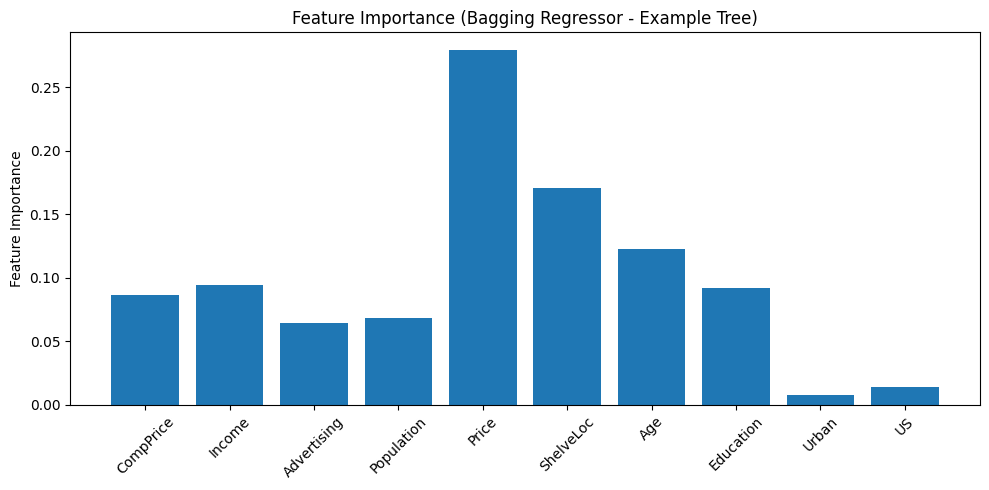

In [17]:
### d. Bagging
bagging = BaggingRegressor(random_state=42, n_estimators=100)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
mse_bag = mean_squared_error(y_test, y_pred_bag)
bag_importances = bagging.estimators_[0].feature_importances_
print(f"MSE for bagging:", {mse_bag})
# Plot feature importances from bagging model (average from first estimator as example)
plt.figure(figsize=(10, 5))
features = X.columns
plt.bar(features, bag_importances)
plt.xticks(rotation=45)
plt.ylabel("Feature Importance")
plt.title("Feature Importance (Bagging Regressor - Example Tree)")
plt.tight_layout()
plt.show()

In [15]:
bag_importances


array([0.08618875, 0.09408569, 0.06410122, 0.06847339, 0.27945808,
       0.17099038, 0.12309537, 0.09225647, 0.00751242, 0.01383824])

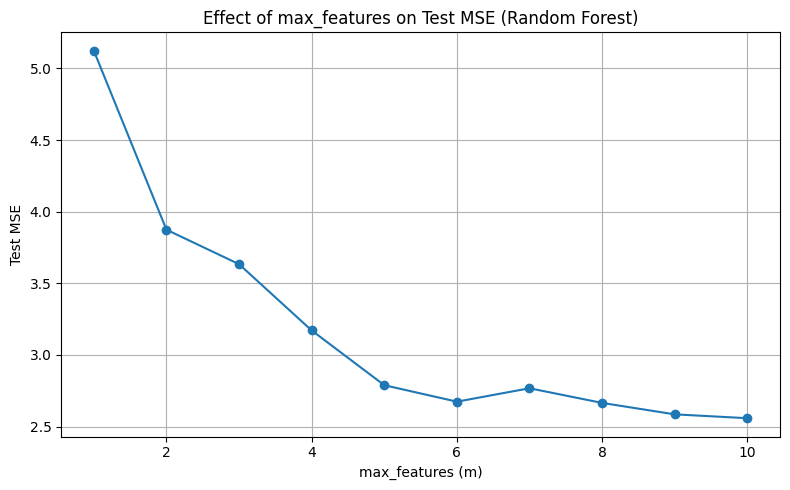

[5.124056831999998,
 3.8744470874999988,
 3.633733750833332,
 3.171104428166665,
 2.7889673442499996,
 2.6738760779999993,
 2.7675101353333327,
 2.665178834333334,
 2.5853687374166667,
 2.558438222249999]

In [19]:
# Evaluate the effect of `max_features` (m) on test MSE in Random Forests

max_features_list = list(range(1, X.shape[1] + 1))  # from 1 to total number of features
mse_list = []

for m in max_features_list:
    rf_m = RandomForestRegressor(n_estimators=100, max_features=m, random_state=42)
    rf_m.fit(X_train, y_train)
    y_pred_m = rf_m.predict(X_test)
    mse_m = mean_squared_error(y_test, y_pred_m)
    mse_list.append(mse_m)

# Plot MSE vs. number of features considered at each split
plt.figure(figsize=(8, 5))
plt.plot(max_features_list, mse_list, marker='o')
plt.xlabel("max_features (m)")
plt.ylabel("Test MSE")
plt.title("Effect of max_features on Test MSE (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

mse_list
